# Exploring the summary data of flights from Brazil

One of the industries that was very impacted by the COVID-19 pandemic was the air transport industry. The data shared by ANAC - the Brazilian Civil Aviation Authority - presents how it was affected. Let's explore this data in this Jupyter notebook and see if we can answer some questions and get some insights.

The data used in this notebook may be found at:

- https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/dados-estatisticos/arquivos/resumo_anual_2019.csv
- https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/dados-estatisticos/arquivos/resumo_anual_2020.csv
- https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/dados-estatisticos/arquivos/resumo_anual_2021.csv

First of all, let's import the libraries we are going to use:

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unidecode

I am using the Seaborn library instead of matplotlib. I am also using the unidecode library to convert the column names to a more friendly format.

Now the files are loaded and merged into a single dataframe.

In [2]:
folder = r'C:\Users\thiag\data\ANAC-transport'

dffiles = ['resumo_anual_2019.csv',
         'resumo_anual_2020.csv',
         'resumo_anual_2021.csv']

df = pd.concat([pd.read_csv(os.path.join(folder, x),
                            sep=';', encoding=('ISO-8859-1'))
                for x in dffiles])

Let's look at the data.

In [3]:
print(df.head())

  EMPRESA (SIGLA) EMPRESA (NOME) EMPRESA (NACIONALIDADE)   ANO  MÊS  \
0             AAF     AIGLE AZUR             ESTRANGEIRA  2019    1   
1             AAF     AIGLE AZUR             ESTRANGEIRA  2019    1   
2             AAF     AIGLE AZUR             ESTRANGEIRA  2019    2   
3             AAF     AIGLE AZUR             ESTRANGEIRA  2019    2   
4             AAF     AIGLE AZUR             ESTRANGEIRA  2019    3   

  AEROPORTO DE ORIGEM (SIGLA) AEROPORTO DE ORIGEM (NOME)  \
0                        LFPO          ORLY (NEAR PARIS)   
1                        SBKP                   CAMPINAS   
2                        LFPO          ORLY (NEAR PARIS)   
3                        SBKP                   CAMPINAS   
4                        LFPO          ORLY (NEAR PARIS)   

  AEROPORTO DE ORIGEM (UF) AEROPORTO DE ORIGEM (REGIÃO)  \
0                      NaN                          NaN   
1                       SP                      SUDESTE   
2                      NaN         

The following can be observed about the column names:
- They are written in Portuguese and contain accentuation;
- They are all in upper case letters;
- They contain spaces and parenthesis.

To facilitate readability we will modify the column names by:
- Replacing the spaces with underlines "_";
- Removing the parenthesis;
- Making all letters lowercase; and
- Removing the accents.
This convention is called snake_case and, even though not standard, it is frequently used. For more information, refer to: https://en.wikipedia.org/wiki/Snake_case

In [4]:
print("Column names before changes:\n")
print(df.columns)

df.columns = [unidecode.unidecode(z.lower())
              .replace(' ','_')
              .replace('(','')
              .replace(')','') 
              for z in df.columns]

df.to_csv('3years.csv', sep=';', index=False)

print("Column names after changes:\n")

print(df.columns)

Column names before changes:

Index(['EMPRESA (SIGLA)', 'EMPRESA (NOME)', 'EMPRESA (NACIONALIDADE)', 'ANO',
       'MÊS', 'AEROPORTO DE ORIGEM (SIGLA)', 'AEROPORTO DE ORIGEM (NOME)',
       'AEROPORTO DE ORIGEM (UF)', 'AEROPORTO DE ORIGEM (REGIÃO)',
       'AEROPORTO DE ORIGEM (PAÍS)', 'AEROPORTO DE ORIGEM (CONTINENTE)',
       'AEROPORTO DE DESTINO (SIGLA)', 'AEROPORTO DE DESTINO (NOME)',
       'AEROPORTO DE DESTINO (UF)', 'AEROPORTO DE DESTINO (REGIÃO)',
       'AEROPORTO DE DESTINO (PAÍS)', 'AEROPORTO DE DESTINO (CONTINENTE)',
       'NATUREZA', 'GRUPO DE VOO', 'PASSAGEIROS PAGOS', 'PASSAGEIROS GRÁTIS',
       'CARGA PAGA (KG)', 'CARGA GRÁTIS (KG)', 'CORREIO (KG)', 'ASK', 'RPK',
       'ATK', 'RTK', 'COMBUSTÍVEL (LITROS)', 'DISTÂNCIA VOADA (KM)',
       'DECOLAGENS', 'CARGA PAGA KM', 'CARGA GRATIS KM', 'CORREIO KM',
       'ASSENTOS', 'PAYLOAD', 'HORAS VOADAS', 'BAGAGEM (KG)'],
      dtype='object')
Column names after changes:

Index(['empresa_sigla', 'empresa_nome', 'empresa_nacio

This looks better.
Let's add some new columns to this dataframe, to support our analysis:
- Since we are looking for a cronologic observation, it is insteresting to concatenate the calendar months and years into a single variable called 'data' (Portuguese for date. I am keeping Portuguese names for consistency).
- We can also infer the routes from the origin and destination airport variables (respectivelly called aeroporto_de_origem_sigla and aeroporto_de_destino_sigla). A variable named 'rota' (Portuguese for route) will be created to store the 'origin->destination' string. Another variable with the names of the airports (instead of the codes) will be created (and alled 'rota_nome') for readability (not everyone knows all airport codes).
- Finally, for 'rpk','ask','rtk' and 'atk' variables, let's substitute the NaN by zeroes.


In [5]:
df['data'] = [str(x['ano']) + '-' + "{:02}".format(x['mes'])
              for index, x in df.iterrows()]

df['rota'] = [str(x['aeroporto_de_origem_sigla']) + '->' +
              str(x['aeroporto_de_destino_sigla'])
              for index, x in df.iterrows()]

df['rota_nome'] = [str(x['aeroporto_de_origem_nome']) + '->' +
              str(x['aeroporto_de_destino_nome'])
              for index, x in df.iterrows()]

df['load_factor'] = df['rpk']/df['ask']

#df['rpk'] = df['rpk'].fillna(0)
#df['ask'] = df['ask'].fillna(0)
#df['rtk'] = df['rtk'].fillna(0)
#df['atk'] = df['atk'].fillna(0)

Since there is no data dictionary, it is now a good time to talk about these variables:
- RPK meaning "Revenue Passenger Kilometers" is an air transport industry metric that aggregates the number of paying passengers and the quantity of kilometers traveled by them. It is calculated by multiplying the number of paying passengers by the distance traveled in kilometers.
- ASK meaning "Available Seat Kilometers" is similar to the RPK but instead of using the paying passengers, the passenger capacity (number of seats available in the aircraft) is multiplied by the traveled distance.
- RTK (for "Revenue tonne kilometres") measures the revenue cargo load in tonnes multiplied by the distance flown in kilometers.
- ATK (for "Available tonne kilometres") measures the aircraft capacity of cargo load in tonnes multiplied by the distance flown in kilometers.

The dataframe presents not only the value of these parameters but also the variables that compose their formula. Therefore, let's make a consistency check, verifying it is possible to reproduce their values through the variables.

The formulas of the variables are:

$ RPK = \frac{\sum{PayingPassengers} \ \times \ distance}{\sum{flights}} $

$ ASK = \frac{\sum{Seats} \ \times \ distance}{\sum{flights}} $

$ RPK = \frac{(AvgWeight \ times \ \sum{PayingPassengers \ + \ BaggageWeight \ + \ CargoWeight \ + \ MailWeight)  } \ \times \ distance}{1000 \times \sum{flights}} $

$ ASK = \frac{\sum{Payload} \ \times \ distance}{1000 \times \sum{flights}} $

In [6]:
#df['ask_calc'] = df['assentos']*df['distancia_voada_km']
#df['rpk_calc'] = df['passageiros_pagos']*df['distancia_voada_km']

In [7]:
dummy = []
for index, x in df.iterrows():
    if x['decolagens'] == 0:
        dummy.append(abs(x['rpk']) < 1000)
    else:
        dummy.append(abs(x['rpk'] - x['passageiros_pagos']*x['distancia_voada_km']/x['decolagens']) < 1000)
print('The number of rpk values that correspond to rpk calculation is: {:.2f}%'.format(100*sum(dummy)/len(dummy)))
df['rpk_calc']= df['passageiros_pagos']*df['distancia_voada_km']/df['decolagens']
del dummy


dummy = []
for index, x in df.iterrows():
    if x['decolagens'] == 0:
        dummy.append(abs(x['ask']) < 1000)
    else:
        dummy.append(abs(x['ask'] - x['assentos']*x['distancia_voada_km']/x['decolagens']) < 1000)
print('The number of ask values that correspond to ask calculation is: {:.2f}%'.format(100*sum(dummy)/len(dummy)))
df['ask_calc']=df['assentos']*df['distancia_voada_km']/df['decolagens']

del dummy

dummy = []
for index, x in df.iterrows():
    if x['decolagens'] == 0:
        dummy.append(abs(x['rtk']) < 1000)
    else:
        dummy.append(abs(x['rtk'] - (75*x['passageiros_pagos']+x['carga_paga_kg']+x['correio_kg']+x['bagagem_kg'] )*
                         x['distancia_voada_km']/(1000*x['decolagens'])) < 1000)
print('The number of rtk values that correspond to rtk calculation is: {:.2f}%'.format(100*sum(dummy)/len(dummy)))
df['rtk_calc']=(75*df['passageiros_pagos']+df['carga_paga_kg']+df['correio_kg']+df['bagagem_kg']
                )*df['distancia_voada_km']/(1000*df['decolagens'])

del dummy

dummy = []
for index, x in df.iterrows():
    if x['decolagens'] == 0:
        dummy.append(abs(x['atk']) < 1000)
    else:
        dummy.append(abs(x['atk'] - x['payload']*x['distancia_voada_km']/(1000*x['decolagens'])) < 1000)
print('The number of atk values that correspond to atk calculation is: {:.2f}%'.format(100*sum(dummy)/len(dummy)))
df['atk_calc']=df['payload']*df['distancia_voada_km']/(1000*df['decolagens'])

del dummy

The number of rpk values that correspond to rpk calculation is: 70.51%
The number of ask values that correspond to ask calculation is: 86.68%
The number of rtk values that correspond to rtk calculation is: 56.28%
The number of atk values that correspond to atk calculation is: 86.13%


We can see that the consistency is variable, and is specifically lower for RTK values.

One clear disadvantage of the calculated RTK is that the same average weight (75 kg) was used for all passengers of all airlines. This assumption implies that Brazilian and foreign companies use (or have to use) the same value for passenger weight to do their flight planning, which may not be true.

Let's observe if being a Brazilian airline or foreign airline has an effect in the relationship between reported RTK and calculated RTK:



<AxesSubplot:xlabel='rtk', ylabel='rtk_calc'>

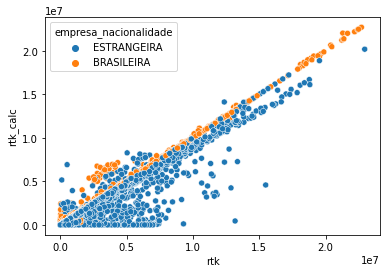

In [8]:
sns.scatterplot(x=df['rtk'],y=df['rtk_calc'],hue=df['empresa_nacionalidade'])

We can see clearly that the line y=x has many Brazilian airlines into it, but not foreign. Also, there is a second line below the y=x line, suggesting a different tendency for some foreign airlines.

By optimizing the error between RKT and calculated RTK for Brazilian airlines and foreign airlines, we arrive at the following values:
- Brazilian airlines have 75kg as the best average value for passenger weight;
- Foreign airlines have 90kg as the best average value for passenger weight.

These numbers come from an optimization exercise is found in the article below:

## PUT LINK HERE

With this knowledge, let's calculate again the RTK:

In [9]:
dummy = []
rtk_calc = []
for index, x in df.iterrows():
    if x['empresa_nacionalidade'] == 'BRASILEIRA':
        avgw = 75
    elif x['empresa_nacionalidade'] == 'ESTRANGEIRA':
        avgw = 90
        
    if x['decolagens'] == 0:
        rtk = float('NaN')
        dummy.append(abs(x['rtk']) < 1000)
    else:
        rtk = (avgw*x['passageiros_pagos']+x['carga_paga_kg']+x['correio_kg']+x['bagagem_kg']
           )*x['distancia_voada_km']/(1000*x['decolagens'])
        dummy.append(abs(x['rtk'] - rtk) < 1000)
    rtk_calc.append(rtk)

print('The number of rtk values that correspond to rtk calculation is: {:.2f}%'.format(100*sum(dummy)/len(dummy)))
df['rtk_calc'] = rtk_calc

del dummy, rtk_calc, rtk

The number of rtk values that correspond to rtk calculation is: 58.90%


We see now that the match of RTK values passed from 56.28% to 58.93%. Let's also reprint the previous graphic with the corrected calculated RTK.

<AxesSubplot:xlabel='rtk', ylabel='rtk_calc'>

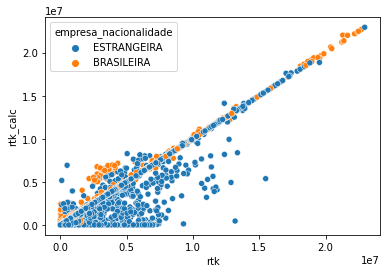

In [10]:
sns.scatterplot(x=df['rtk'],y=df['rtk_calc'],hue=df['empresa_nacionalidade'])

We can see that the second tendency line is gone, since we have took into consideration its behaviour in our model.

After the consistency check, let's take a look on how the number of flights has evolved through time in our database flights.

Text(0.5, 0.98, '# Flights per month')

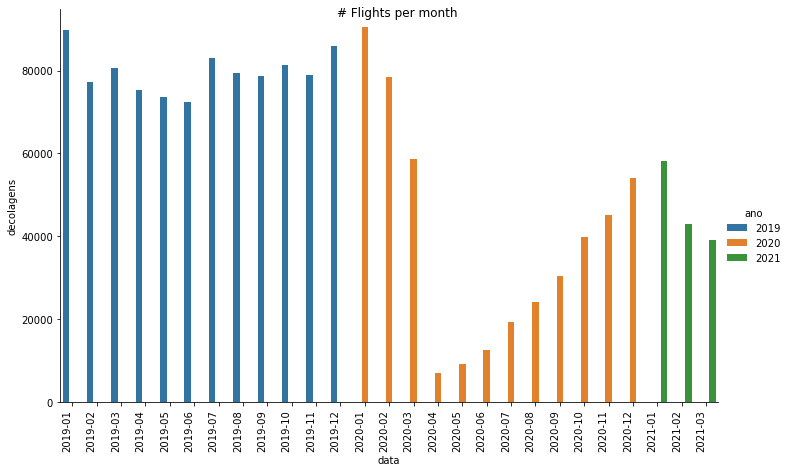

In [11]:
df1 = pd.DataFrame(df.groupby(by=['data','ano']).agg('sum')['decolagens'])

df1.reset_index(inplace=True)
ax = sns.catplot(x='data', y='decolagens', data=df1, kind='bar', hue='ano', height=6, aspect=10/6,
                 sharey=True)

ax.set_xticklabels(rotation=90, ha="right")    
ax.fig.suptitle('# Flights per month')

We can see the number of flights diminishes drastically after March 2020. Interestingly enough, this should not be credited only to the pandemic effect, since January is the month with most flights in an year.

Let's verify what are the busiest airports (according to number of takeoffs) in Brazil, according to ANAC's data:

                          decolagens
aeroporto_de_origem_nome            
GUARULHOS                   233420.0
RIO DE JANEIRO              139209.0
SÃO PAULO                   124867.0
CAMPINAS                    103436.0
BRASÍLIA                    101135.0
CONFINS                      80310.0
RECIFE                       63420.0
PORTO ALEGRE                 52173.0
SALVADOR                     50196.0
SÃO JOSÉ DOS PINHAIS         45537.0


Text(0.5, 0.98, '# Flights per airport')

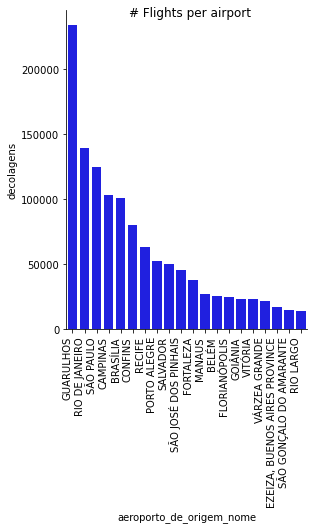

In [13]:
df2 = pd.DataFrame(df.groupby(by=['aeroporto_de_origem_nome']).agg('sum')['decolagens'])
df2 = df2.sort_values(by=['decolagens'], ascending=False)
print(df2[:10])
df2.reset_index(inplace=True)

ax = sns.catplot(x='aeroporto_de_origem_nome', y='decolagens',
                 data=df2[:20], kind='bar', color='b', sharey=True)

ax.set_xticklabels(rotation=90, ha="right")
ax.fig.suptitle('# Flights per airport')

Text(0.5, 0.98, '# Flights in Guarulhos airport per month')

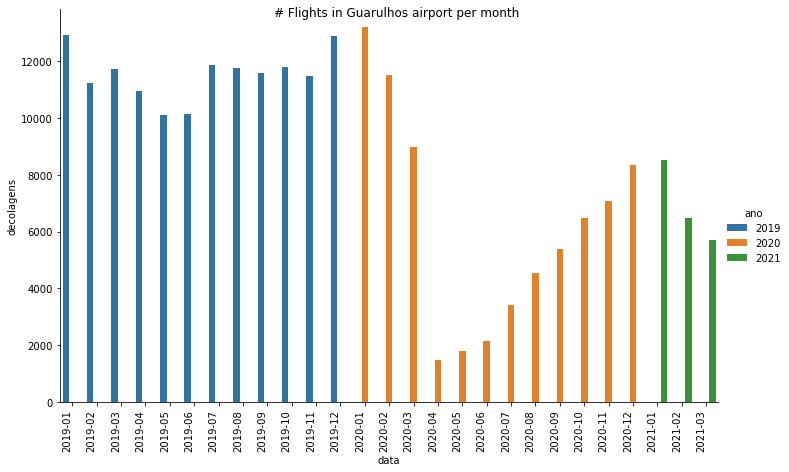

In [14]:
df3 = df[df['aeroporto_de_origem_nome']=='GUARULHOS']
df3 = pd.DataFrame(df3.groupby(by=['data','ano']).agg('sum')['decolagens'])
df3.reset_index(inplace=True)

ax = sns.catplot(x='data', y='decolagens', data=df3, kind='bar', hue='ano', height=6, aspect=10/6, sharey=True)

ax.set_xticklabels(rotation=90, ha="right")
ax.fig.suptitle('# Flights in Guarulhos airport per month')

Let's verify also if the impact of the travel restrictions affected Brazilian and foreign airlines differently.

Text(0.5, 0.98, '# Flights per Month - Brazilian and Foreign Airlines')

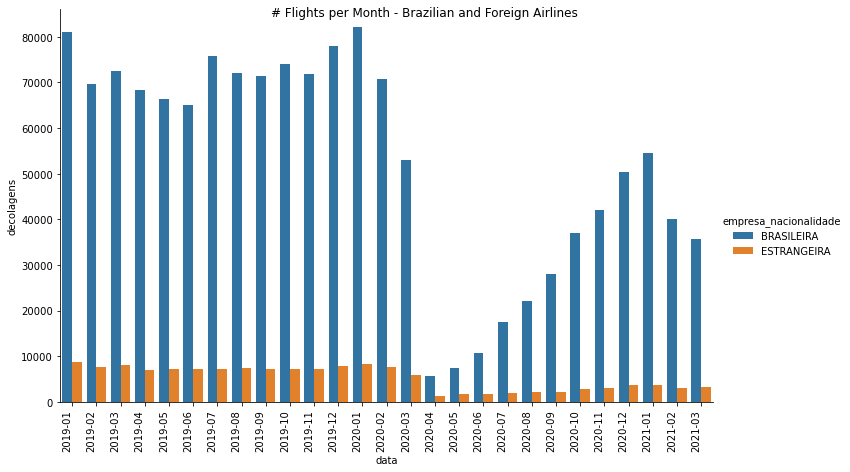

In [15]:
df4 = pd.DataFrame(df.groupby(by=['data', 'empresa_nacionalidade']).agg('sum')['decolagens'])

df4[df4.index.isin(['ESTRANGEIRA'],level=1)]['decolagens'].values

df4.reset_index(inplace=True)

ax = sns.catplot(x='data', y='decolagens',
                 data=df4, kind='bar', hue='empresa_nacionalidade', height=6, aspect=10/6, sharey=True)

ax.set_xticklabels(rotation=90, ha="right")
ax.fig.suptitle('# Flights per Month - Brazilian and Foreign Airlines')

From the graphic above we can see that Brazilian airlines present most volatility on number of flights than international airlines.

Let's now check the routes with most number of flights in the data set.

Text(0.5, 0.98, '# Flights per route')

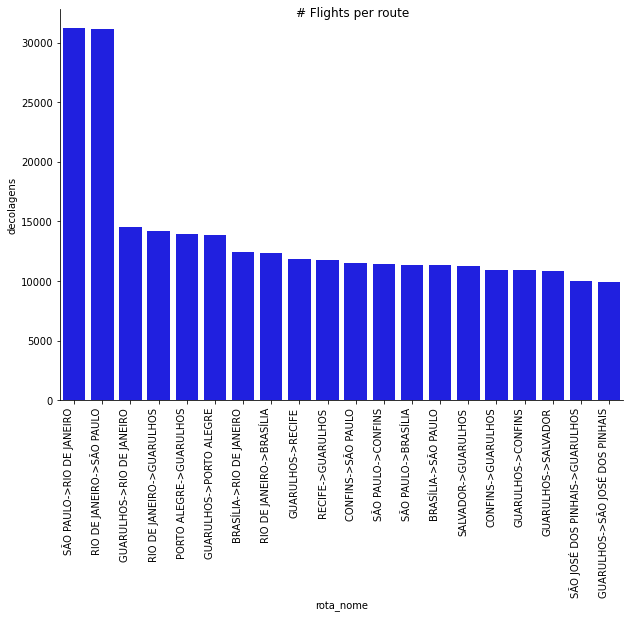

In [16]:
df5 = pd.DataFrame(df.groupby(by=['rota_nome']).agg('sum')['decolagens'])
df5 = df5.sort_values(by=['decolagens'], ascending=False)
df5.reset_index(inplace=True)

ax = sns.catplot(x='rota_nome', y='decolagens',
                 data=df5[:20], kind='bar', color='b', height=6, aspect=10/6, sharey=True)

ax.set_xticklabels(rotation=90, ha="right")
ax.fig.suptitle('# Flights per route')

We can see that even though Guarulhos (São Paulo international airport) is the busiest airport per number of flights in Brazil, it is not present in the Top 2 routes, which are between Rio de Janeiro and São Paulo local airports. Guarulhos, however is present in 10 of the Top 20 routes, which shows its relevancy as a national and international hub.

Let's now observe the temporal effect on the top 5 routes (per number of flights) in this dataframe:

In [17]:
toproutes = df5['rota_nome'][:5]

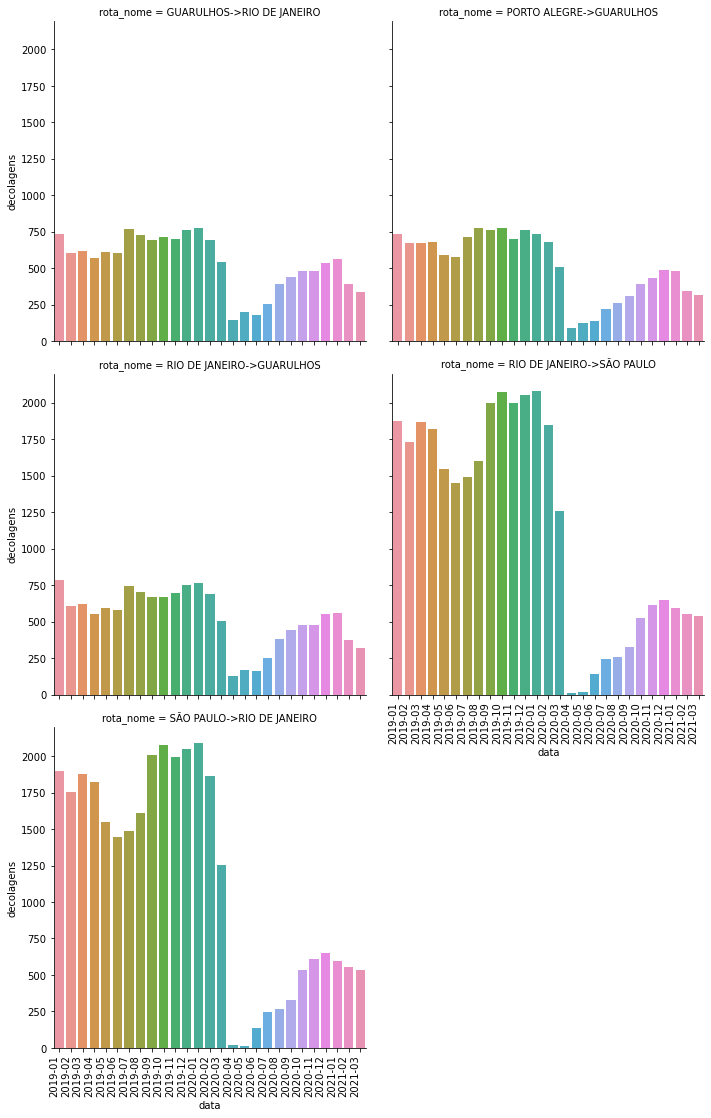

In [18]:
df6 = pd.DataFrame(df[df['rota_nome'].isin(list(toproutes))]
                   .groupby(by=['data', 'rota_nome'])
                   .agg('sum')['decolagens'])
df6.reset_index(inplace=True)

ax = sns.catplot(x='data', y='decolagens', #height=6, aspect=10/6, #hue='rota (nome)',  
            col='rota_nome', data=df6, kind='bar', col_wrap=2,
            sharey=True)

ax.set_xticklabels(rotation=90, ha="right")
#ax.fig.suptitle('# TAKEOFFs per month - route')

Let's now check the top RPK routes.

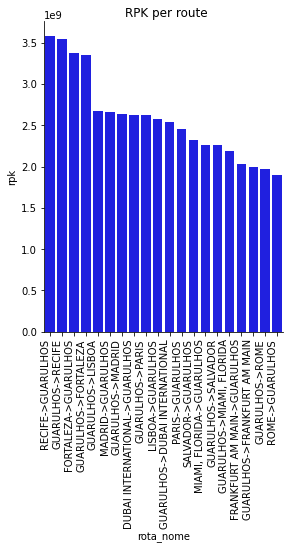

In [28]:
df7 = pd.DataFrame(df.groupby(by=['rota_nome', 'empresa_nacionalidade'])
                   .agg('sum')['rpk'])

df7 = df7.sort_values(by=['rpk'], ascending=False)

df7.reset_index(inplace=True)

ax = sns.catplot(x='rota_nome', y='rpk', #hue='rota_nome', col='empresa_nacionalidade',
                 data=df7[0:20], kind='bar', color='b', #col_wrap=2,
                 sharey=True)

ax.set_xticklabels(rotation=90, ha="right")
ax.fig.suptitle('RPK per route')

toprpkroutes = df7['rota_nome'].loc[:19]

And now the evolution of the top RPK routes through the dates of this data set.

Text(0.5, 0.98, 'RPK per month - route')

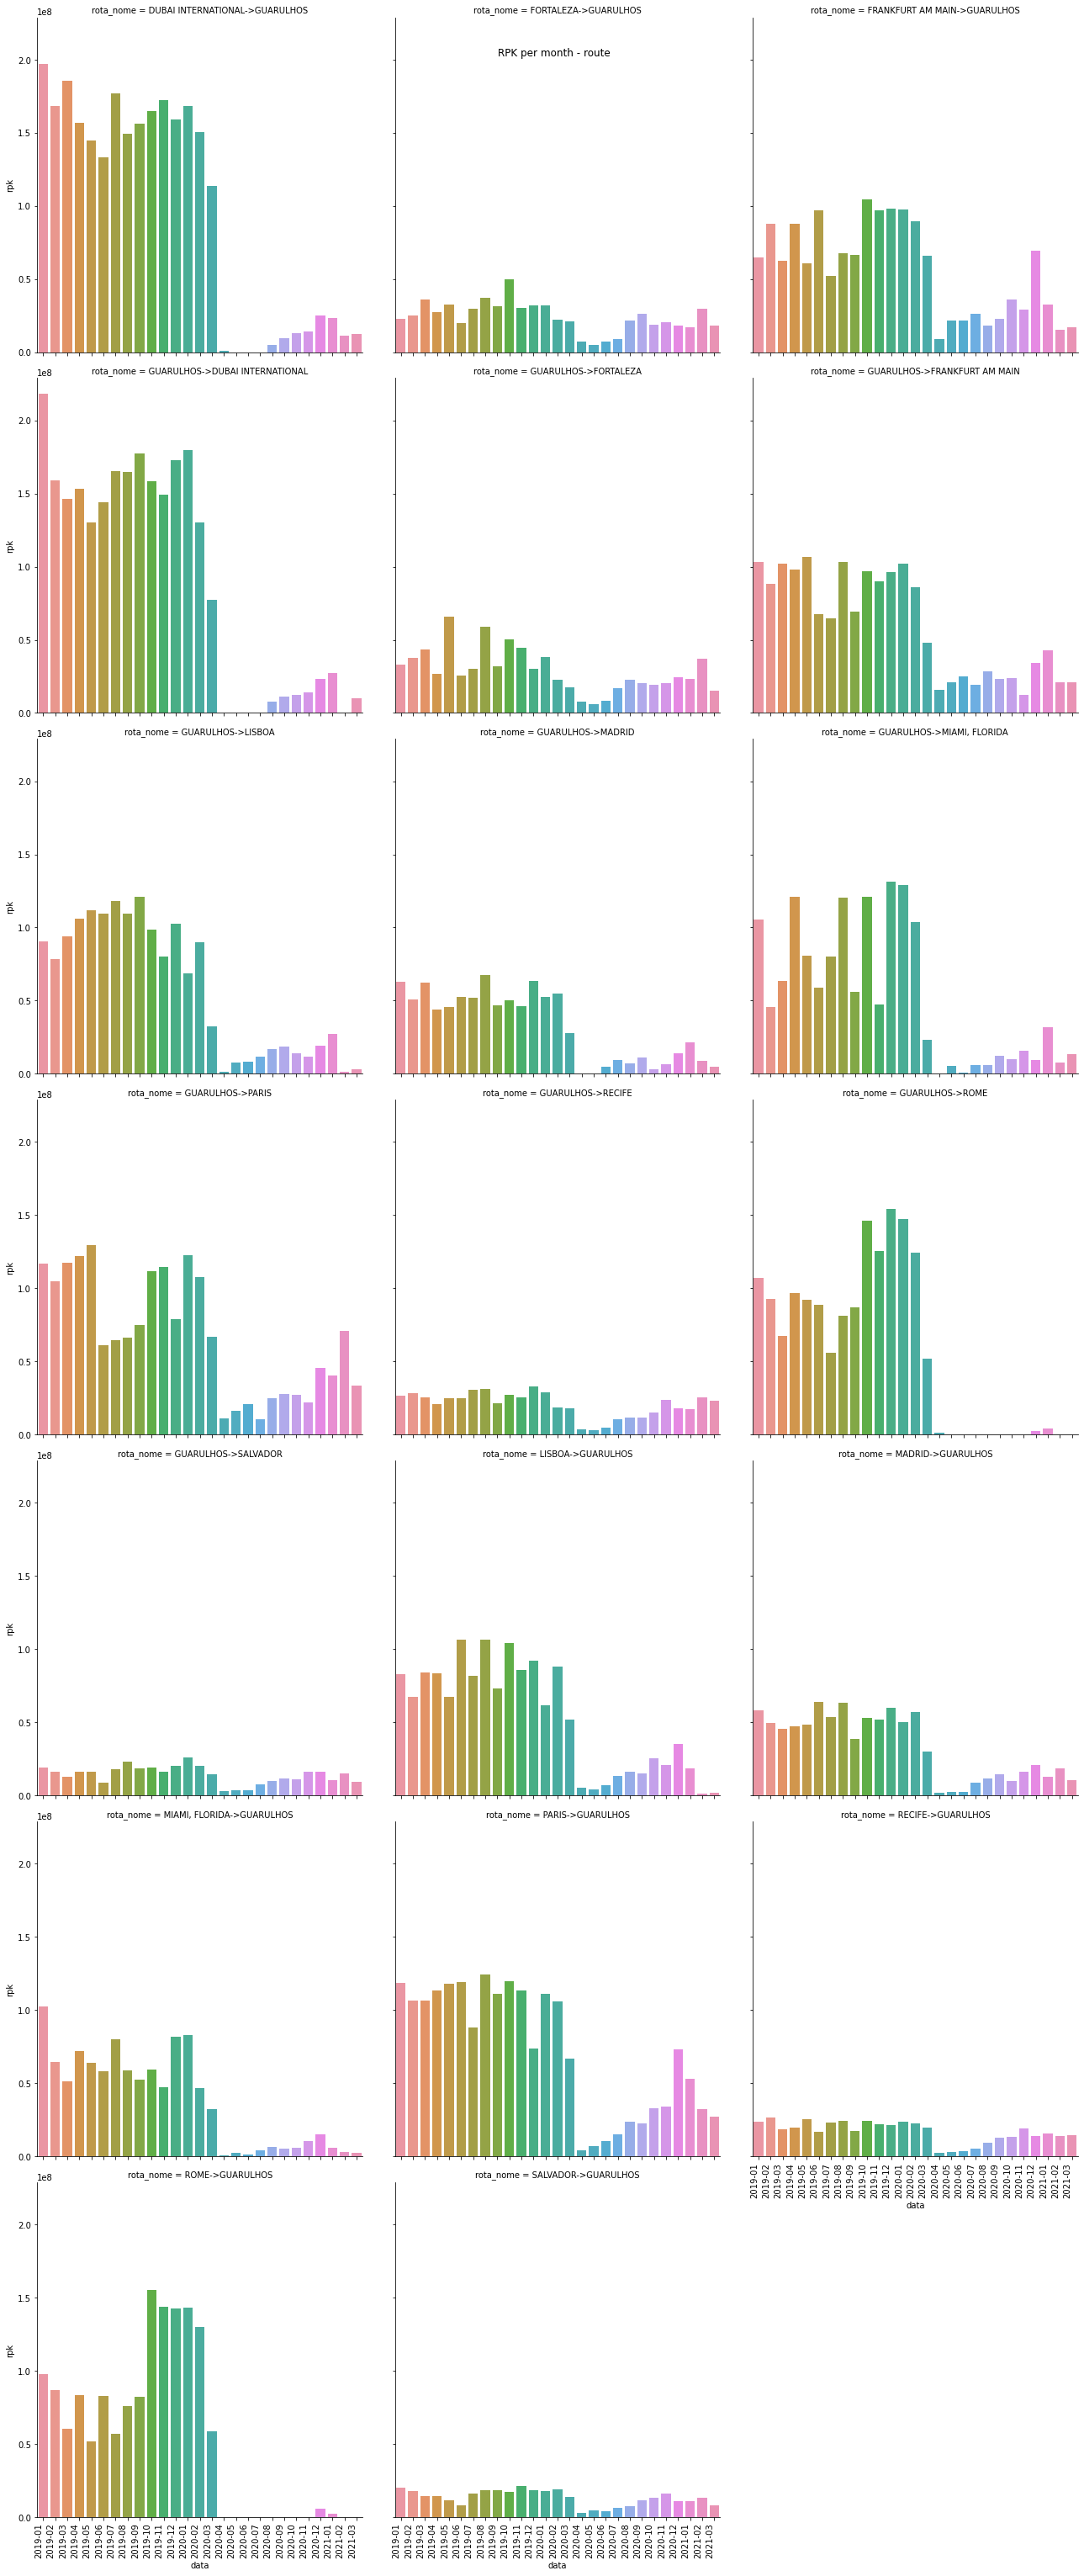

In [29]:
df8 = pd.DataFrame(df[df['rota_nome'].isin(list(toprpkroutes))]
                    .groupby(by=['rota_nome', 
                                 'data']).agg(
                                       rpk=pd.NamedAgg('rpk','mean'),
                                       decolagens=pd.NamedAgg('decolagens','sum')
                                       ))
df8.reset_index(inplace=True) 

ax = sns.catplot(x='data', y='rpk', #hue='decolagens',
                 col='rota_nome',
                 data=df8, kind='bar', col_wrap=3,
                 sharey=True, height=6, aspect=1)

ax.set_xticklabels(rotation=90, ha="right")
ax.fig.suptitle('RPK per month - route')

Another more relevant check is about the load factor of these routes. Let's observe how the load factor of these routes was affected by travel restrictions.

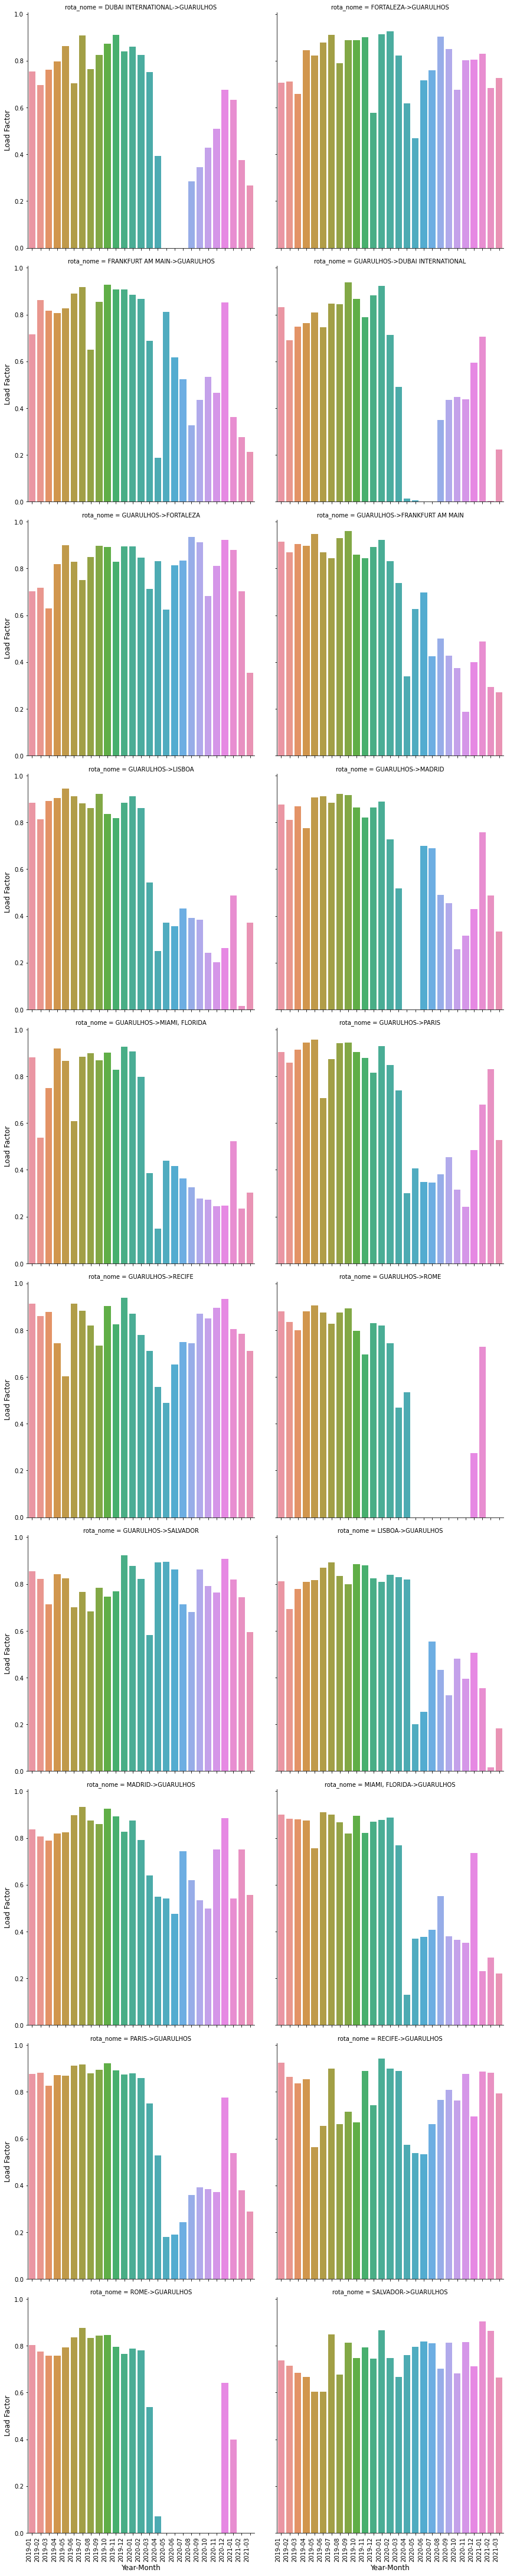

In [25]:
ax = sns.catplot(x='data', y='load_factor', #hue='decolagens',
                 col='rota_nome',
                 data=df9, kind='bar', col_wrap=2,
                 sharey=True, height=6, aspect=1)

ax.set_xticklabels(rotation=90, ha="right")

ax.set_xlabels("Year-Month",fontsize=12)
ax.set_ylabels("Load Factor",fontsize=12)
#ax.fig.suptitle('test',fontsize=10, p)

Clearly many routes - especially international routes - were severelly impacted by the travel restrictions due to COVID-19.